In [2]:
# import os
# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
# Helpful statement for debugging, prints the thing entered as x and the output, i.e.,
# debugPrint(1+1) will output '1+1 [int] = 2'
import inspect
import re
def debugPrint(x):
    frame = inspect.currentframe().f_back
    s = inspect.getframeinfo(frame).code_context[0]
    r = re.search(r"\((.*)\)", s).group(1)
    print("{} [{}] = {}".format(r,type(x).__name__, x))
    
    
import os
import os, sys
import torch
os.environ['TORCH_CUDA_ARCH_LIST'] = f'{torch.cuda.get_device_properties(0).major}.{torch.cuda.get_device_properties(0).minor}'

# sys.path.append(os.path.join('~/dev/pytorchSPH/', "lib"))
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from tqdm.notebook import trange, tqdm
import yaml
%matplotlib widget
import warnings
warnings.filterwarnings(action='once')
from datetime import datetime

import torch
# from torch_geometric.nn import radius
# from torch_geometric.nn import SplineConv, fps, global_mean_pool, radius_graph, radius

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import tomli
from scipy.optimize import minimize
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker

import torch
# import torchvision.models as models
from torch.profiler import profile, record_function, ProfilerActivity
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from tqdm import TqdmExperimentalWarning

warnings.filterwarnings("ignore", category=TqdmExperimentalWarning)

# import seaborn as sns
# from diffSPH.util import evalArea
# from diffSPH.noise.generator import generatePerlin, generateSimplex, generateOctaveNoise
from scipy import interpolate
# from diffSPH.modules.neighborSearch import radiusCompactHashMap, periodicNeighborSearch
# from diffSPH.util import scatter_sum
from sphMath.kernels import *
# from diffSPH.randomParticles import generatePeriodicRandomParticles

torch.Size([255, 1])
tensor([3.4375e+00, 3.4370e+00, 3.4356e+00, 3.4332e+00, 3.4298e+00, 3.4255e+00,
        3.4203e+00, 3.4141e+00, 3.4070e+00, 3.3989e+00, 3.3899e+00, 3.3800e+00,
        3.3692e+00, 3.3574e+00, 3.3448e+00, 3.3313e+00, 3.3170e+00, 3.3018e+00,
        3.2857e+00, 3.2688e+00, 3.2511e+00, 3.2326e+00, 3.2133e+00, 3.1932e+00,
        3.1724e+00, 3.1508e+00, 3.1285e+00, 3.1055e+00, 3.0818e+00, 3.0575e+00,
        3.0324e+00, 3.0068e+00, 2.9805e+00, 2.9537e+00, 2.9263e+00, 2.8983e+00,
        2.8698e+00, 2.8408e+00, 2.8112e+00, 2.7813e+00, 2.7508e+00, 2.7200e+00,
        2.6887e+00, 2.6570e+00, 2.6250e+00, 2.5926e+00, 2.5599e+00, 2.5269e+00,
        2.4936e+00, 2.4601e+00, 2.4263e+00, 2.3923e+00, 2.3581e+00, 2.3238e+00,
        2.2892e+00, 2.2546e+00, 2.2198e+00, 2.1849e+00, 2.1500e+00, 2.1150e+00,
        2.0799e+00, 2.0449e+00, 2.0098e+00, 1.9748e+00, 1.9398e+00, 1.9048e+00,
        1.8700e+00, 1.8352e+00, 1.8005e+00, 1.7660e+00, 1.7315e+00, 1.6973e+00,
        1.6632e+00,

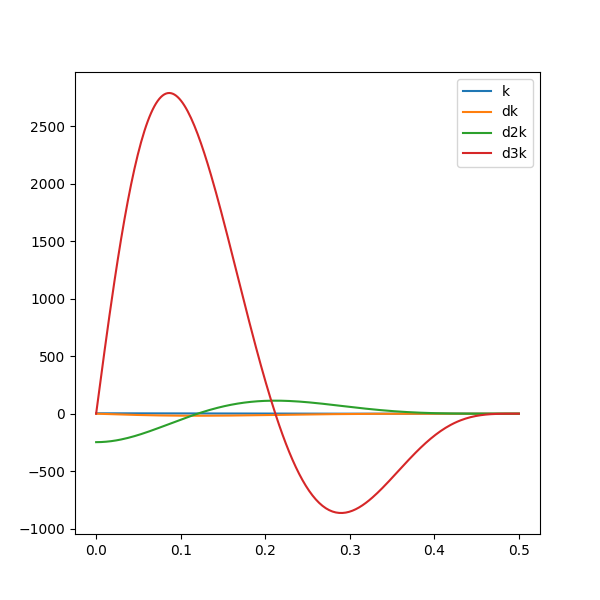

In [10]:
fig,axis = plt.subplots(1,1, figsize = (6,6), squeeze=False)
kernel = getSPHKernelv2('Wendland6')
kernelEnum = getKernelEnum('Wendland6')
# from diffSPH.v2.finiteDifference import centralDifferenceStencil, continuousGradient
# stencil = centralDifferenceStencil(1, 2)

dim = 1

xx = torch.linspace(0,1,255).view(-1,1)
if dim > 1:
    for i in range(1, dim):
        xx_ = torch.zeros_like(xx[:,0]).view(-1,1)
        # print(i, xx.shape, xx_.shape)
        xx = torch.hstack((xx, xx_))

print(xx.shape)
h = torch.ones_like(xx[:,0]) * 0.5
xx *= h.view(-1,1)


k = kernel.eval(xx, h)
dkdq = eval_dkdq(kernelEnum, torch.linalg.norm(xx, dim = -1) / h, dim = xx.shape[1]) * Kernel_C_d(kernelEnum, dim) * h**(-dim-1)
d2kdq2 = eval_d2kdq2(kernelEnum, torch.linalg.norm(xx, dim = -1) / h, dim = xx.shape[1]) * Kernel_C_d(kernelEnum, dim) * h**(-dim-2)
d3kdq3 = eval_d3kdq3(kernelEnum, torch.linalg.norm(xx, dim = -1) / h, dim = xx.shape[1]) * Kernel_C_d(kernelEnum, dim) * h**(-dim-3)

normalized = False
if normalized:
    k = k / k.abs().max()
    dkdq = dkdq / dkdq.abs().max()
    d2kdq2 = d2kdq2 / d2kdq2.abs().max()
    d3kdq3 = d3kdq3 / d3kdq3.abs().max()

axis[0,0].plot(xx[:,0], k, label = 'k')

axis[0,0].plot(xx[:,0], dkdq, label = 'dk')
# finite_Gradient = continuousGradient(lambda x: kernel.k(x, dim = 2), xx.view(-1,1), stencil, 1e-5, 1) * 2
# axis[0,0].plot(xx[:,0], finite_Gradient, label = 'finite dk', ls = ':', c = 'black')

axis[0,0].plot(xx[:,0], d2kdq2, label = 'd2k')


axis[0,0].plot(xx[:,0], d3kdq3, label = 'd3k')

print(k)
# axis[0,0].plot(xx[:,0], kernel.d2kdq2(xx, dim = 2), label = 'd2k')
# finite_Gradient = continuousGradient(lambda x: kernel.dkdq(x, dim = 2), xx.view(-1,1), stencil, 1e-5, 1) * 2
# axis[0,0].plot(xx[:,0], finite_Gradient, label = 'finite d2k', ls = ':', c = 'black')

# axis[0,0].plot(xx[:,0], kernel.d3kdq3(xx, dim = 2), label = 'd3k')
# finite_Gradient = continuousGradient(lambda x: kernel.d2kdq2(x, dim = 2), xx.view(-1,1), stencil, 1e-5, 1) * 2
# axis[0,0].plot(xx[:,0], finite_Gradient, label = 'finite d3k', ls = ':', c = 'black')

axis[0,0].legend()

Evaluating Function
Gradient Order: 1
Gradient Order: 2
tensor([   nan, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 

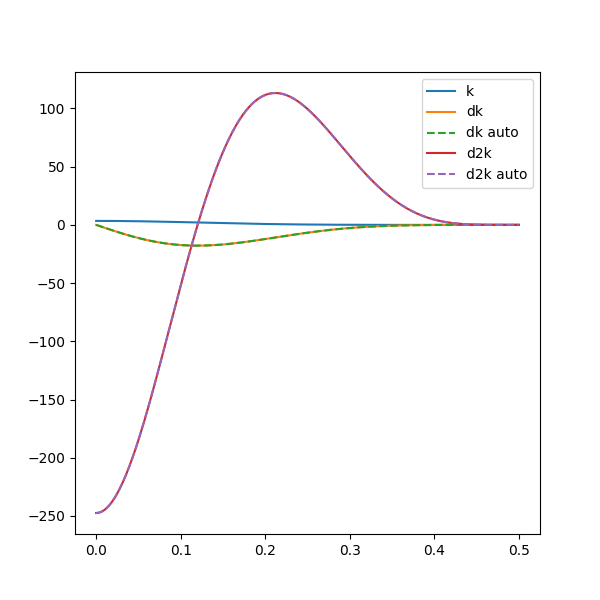

In [11]:
from sphMath.gradientUtil import derivative, eval_fn_grad, Jacobian, Hessian, Patrician

positions_g = xx.clone()
positions_g.requires_grad = True

grad = eval_fn_grad(lambda x: kernel.eval(x, h), positions_g, order = 2)

fig,axis = plt.subplots(1,1, figsize = (6,6), squeeze=False)
axis[0,0].plot(xx[:,0], k, label = 'k')

axis[0,0].plot(xx[:,0], dkdq, label = 'dk')

if normalized:
    dkdq_auto = grad[1] / grad[1].abs().max()
else:
    dkdq_auto = grad[1]
axis[0,0].plot(xx[:,0], dkdq_auto.detach(), label = 'dk auto', ls = '--')

print(dkdq_auto[:,0].detach() / dkdq.detach())

axis[0,0].plot(xx[:,0], d2kdq2, label = 'd2k')

if normalized:
    dkdq_auto = grad[2] / grad[2].abs().max()
else:
    dkdq_auto = grad[2]
axis[0,0].plot(xx[:,0], dkdq_auto[:,0,0].detach(), label = 'd2k auto', ls = '--')

# print(dkdq_auto[:,0,0])

axis[0,0].legend()

# axis[0,0].plot(xx[:,0], d3kdq3, label = 'd3k')


Wendland6
Evaluating Function
Gradient Order: 1
Gradient Order: 2


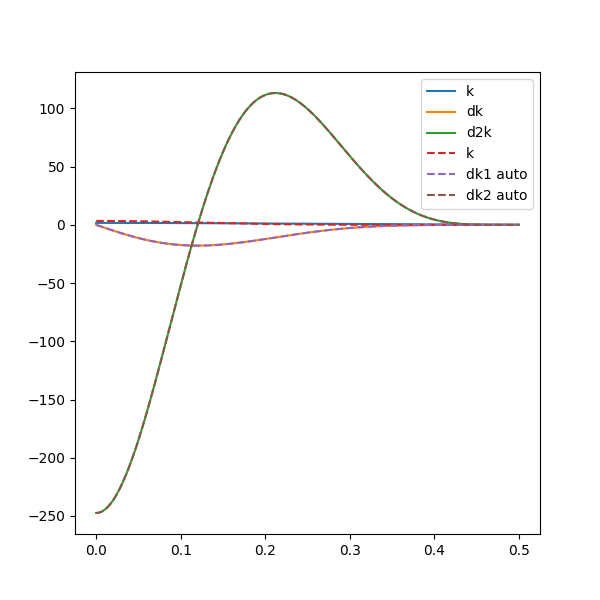

In [16]:
from sphMath.gradientUtil import derivative, eval_fn_grad, Jacobian, Hessian, Patrician

positions_g = xx.clone()
positions_g.requires_grad = True

q = xx[:,0].clone()
q.requires_grad = True
print(kernelEnum.name)

k = eval_k(kernelEnum, positions_g, dim = dim).detach()* Kernel_C_d(kernelEnum, dim)

# eval_k(kernelEnum, q, dim = 1)

# grad = eval_fn_grad(lambda x: kernel.eval(x, h), positions_g, order = 2)

grad = eval_fn_grad(lambda x: eval_k(kernelEnum, x/h, dim = dim) * Kernel_C_d(kernelEnum, dim) * h**(-dim), q, order = 2)

fig,axis = plt.subplots(1,1, figsize = (6,6), squeeze=False)
axis[0,0].plot(xx[:,0], k, label = 'k')

axis[0,0].plot(xx[:,0], dkdq, label = 'dk')
axis[0,0].plot(xx[:,0], d2kdq2, label = 'd2k')

normalized = False
if normalized:
    dkdq_auto = grad[0] / grad[0].abs().max()
else:
    dkdq_auto = grad[0]
axis[0,0].plot(xx[:,0], dkdq_auto.detach(), label = 'k', ls = '--')

if normalized:
    dkdq_auto = grad[1] / grad[1].abs().max()
else:
    dkdq_auto = grad[1]
axis[0,0].plot(xx[:,0], dkdq_auto.detach(), label = 'dk1 auto', ls = '--')

if normalized:
    dkdq_auto = grad[2] / grad[2].abs().max()
else:
    dkdq_auto = grad[2]
axis[0,0].plot(xx[:,0], dkdq_auto.detach(), label = 'dk2 auto', ls = '--')

# axis[0,0].plot(xx[:,0], d2kdq2, label = 'd2k')


# axis[0,0].plot(xx[:,0], d3kdq3, label = 'd3k')
axis[0,0].legend()


In [17]:

grad = eval_fn_grad(lambda x: kernel.jacobian(x, h)[:,0], positions_g, order = 1)

# grad = eval_fn_grad(lambda x: kernel.eval(x, h), positions_g, order = 2)


Evaluating Function
Gradient Order: 1


tensor([-2.4750e+02, -2.4739e+02, -2.4707e+02, -2.4653e+02, -2.4579e+02,
        -2.4483e+02, -2.4366e+02, -2.4228e+02, -2.4070e+02, -2.3892e+02,
        -2.3695e+02, -2.3478e+02, -2.3241e+02, -2.2987e+02, -2.2714e+02,
        -2.2424e+02, -2.2116e+02, -2.1792e+02, -2.1452e+02, -2.1096e+02,
        -2.0725e+02, -2.0339e+02, -1.9940e+02, -1.9528e+02, -1.9103e+02,
        -1.8666e+02, -1.8217e+02, -1.7758e+02, -1.7288e+02, -1.6809e+02,
        -1.6321e+02, -1.5824e+02, -1.5320e+02, -1.4809e+02, -1.4291e+02,
        -1.3767e+02, -1.3239e+02, -1.2705e+02, -1.2168e+02, -1.1627e+02,
        -1.1084e+02, -1.0538e+02, -9.9910e+01, -9.4427e+01, -8.8938e+01,
        -8.3451e+01, -7.7969e+01, -7.2499e+01, -6.7045e+01, -6.1612e+01,
        -5.6207e+01, -5.0832e+01, -4.5494e+01, -4.0197e+01, -3.4944e+01,
        -2.9742e+01, -2.4592e+01, -1.9501e+01, -1.4471e+01, -9.5068e+00,
        -4.6114e+00,  2.1158e-01,  4.9587e+00,  9.6267e+00,  1.4213e+01,
         1.8714e+01,  2.3127e+01,  2.7450e+01,  3.1

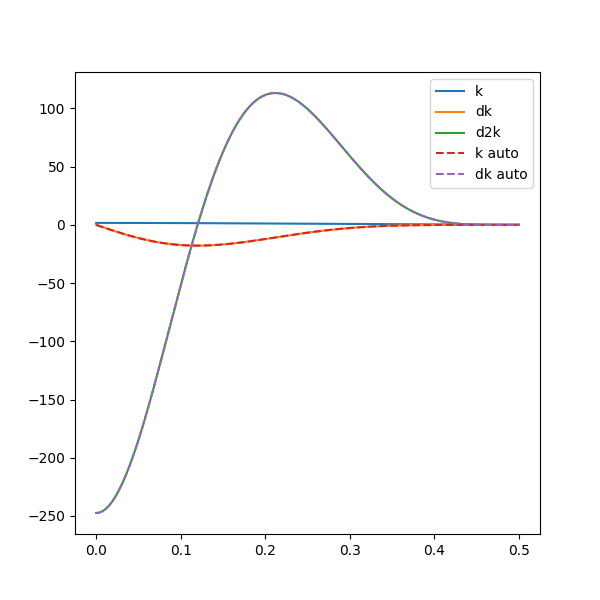

In [18]:

fig,axis = plt.subplots(1,1, figsize = (6,6), squeeze=False)
axis[0,0].plot(xx[:,0], k, label = 'k')

axis[0,0].plot(xx[:,0], dkdq, label = 'dk')
axis[0,0].plot(xx[:,0], d2kdq2, label = 'd2k')

if normalized:
    dkdq_auto = grad[0] / grad[0].abs().max()
else:
    dkdq_auto = grad[0]
axis[0,0].plot(xx[:,0], dkdq_auto.detach(), label = 'k auto', ls = '--')
if normalized:
    dkdq_auto = grad[1] / grad[1].abs().max()
else:
    dkdq_auto = grad[1]
axis[0,0].plot(xx[:,0], dkdq_auto[:,0].detach(), label = 'dk auto', ls = '--')

# axis[0,0].plot(xx[:,0], d2kdq2, label = 'd2k')


# axis[0,0].plot(xx[:,0], d3kdq3, label = 'd3k')
axis[0,0].legend()
print(dkdq_auto[:,0])
print(dkdq_auto[:,0] / d2kdq2)

In [10]:
Kernel_C_d = eval_C_d(kernelEnum, dim)
print(Kernel_C_d ** 2)


2.9541015625


In [94]:
def norm_(input):
    return torch.linalg.norm(input, dim = -1, keepdim = False)
def norm_grad(input):
    return torch.nn.functional.normalize(input, dim = -1)
def norm_hess(input):
    eps = get_epsilon(input.dtype) * input.abs().max()
    r = torch.linalg.norm(input, dim = -1).view(-1,1,1)# + eps

    outerProd = torch.einsum('ij,ik->ijk', input, input)
    diagTerm = torch.eye(input.shape[1], device = input.device) * r**2 + torch.eye(input.shape[1], device = input.device) * eps**3

    tensor = 1/(r**3 + eps**3) * (diagTerm - outerProd)
    return tensor

class vectorNormalize_(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return norm_grad(input)
    
    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        tensor = norm_hess(input)

        return torch.einsum('...ij, ...j -> ...i', tensor, grad_output)

class vectorNorm_(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return norm_(input)

    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        grad_input = torch.einsum('...i, ... -> ...i', norm_grad(input), grad_output)
        return grad_input
    
vectorNorm = vectorNorm_.apply
vectorNormalize = vectorNormalize_.apply

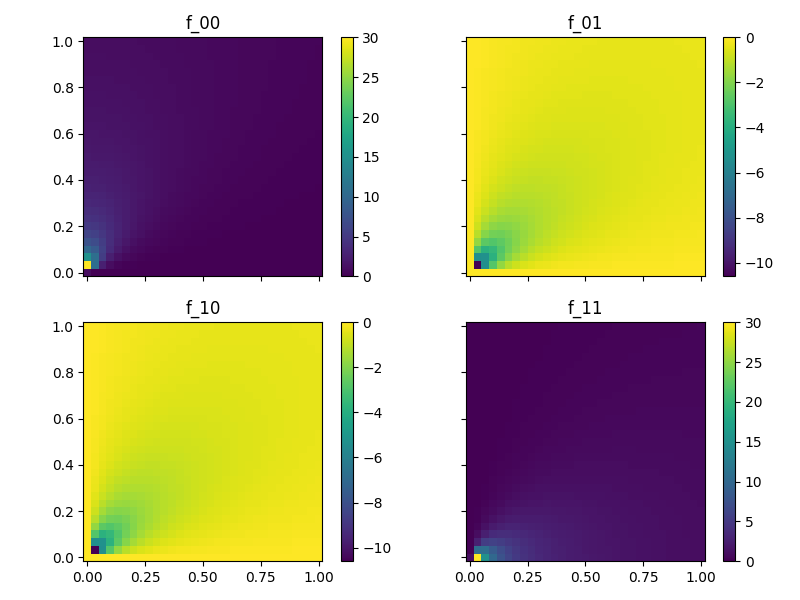

In [ ]:
x = torch.linspace(0,1, 31).view(-1,1)
y = torch.linspace(0,1, 31).view(-1,1)
X, Y = torch.meshgrid(x[:,0], y[:,0], indexing = 'xy')
points = torch.stack((X.flatten(), Y.flatten()), dim = -1)

r = torch.linalg.norm(points, dim = -1)
f = torch.einsum('nu, nv -> nuv', points, points) / (r**2).view(-1,1,1)

f = norm_hess(points)

# eps = get_epsilon(x.dtype)
# factorB = -torch.einsum('nu, nv -> nuv', points, points) / (r**3).view(-1,1,1)
# factorB += torch.eye(dim, device = x.device, dtype = x.dtype) / (r).view(-1,1,1)
# f = factorB

f_00 = f[:,0,0]
f_01 = f[:,0,1]
f_10 = f[:,1,0]
f_11 = f[:,1,1]

fig, axis = plt.subplots(2,2, figsize = (8,6), squeeze=False, sharex=True, sharey=True)

sc = axis[0,0].pcolormesh(X, Y, f_00.view(X.shape), shading='auto')
fig.colorbar(sc, ax=axis[0,0])
axis[0,0].set_title('f_00')
sc = axis[0,1].pcolormesh(X, Y, f_01.view(X.shape), shading='auto')
fig.colorbar(sc, ax=axis[0,1])
axis[0,1].set_title('f_01')
sc = axis[1,0].pcolormesh(X, Y, f_10.view(X.shape), shading='auto')
fig.colorbar(sc, ax=axis[1,0])
axis[1,0].set_title('f_10')
sc = axis[1,1].pcolormesh(X, Y, f_11.view(X.shape), shading='auto')
fig.colorbar(sc, ax=axis[1,1])
axis[1,1].set_title('f_11')

for ax in axis.flatten():
    ax.set_aspect('equal')

fig.tight_layout()


In [28]:
print(f)

tensor([[[   nan,    nan],
         [   nan,    nan]],

        [[1.0000, 0.0000],
         [0.0000, 0.0000]],

        [[1.0000, 0.0000],
         [0.0000, 0.0000]],

        ...,

        [[0.4960, 0.5000],
         [0.5000, 0.5040]],

        [[0.4980, 0.5000],
         [0.5000, 0.5020]],

        [[0.5000, 0.5000],
         [0.5000, 0.5000]]])


In [16]:
r = torch.linalg.norm(xx, dim = -1)
xx[:,0] * xx[:,0] / (r**2 + 1e-9)

tensor([0.0000, 0.9999, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

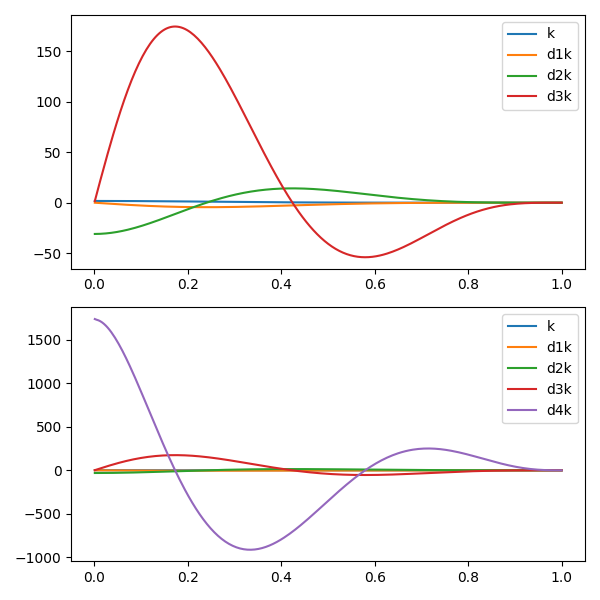

In [4]:
from sphMath.gradientUtil import derivative, eval_fn_grad, Jacobian, Hessian, Patrician

xx = torch.linspace(1e-3,1,255)
support = 1.0
positions = xx.view(-1,1) * support

kernelValue = kernel.eval(positions, support)
gradKernelValue = kernel.jacobian(positions, support)
hessianKernelValue = kernel.hessian(positions, support)
thirdKernelValue = kernel.thirdOrderDerivatives(positions, torch.tensor([support]))

fig, axis = plt.subplots(2,1, figsize = (6,6), squeeze=False)
axis[0,0].plot(positions, kernelValue, label = 'k')
axis[0,0].plot(positions, gradKernelValue[:,0], label = 'd1k')
axis[0,0].plot(positions, hessianKernelValue[:,0,0], label = 'd2k')
axis[0,0].plot(positions, thirdKernelValue[:,0,0,0], label = 'd3k')

import torch.autograd as autograd

positions_g = positions.clone()
positions_g.requires_grad = True
# kernelValue_g = kernel.eval(positions_g, support)

terms = eval_fn_grad(lambda x: kernel.eval(x, support), positions_g, order = 4)
# kernelValue_g = terms[0]
# gradients = terms[1]

for it, t in enumerate(terms):
    axis[1,0].plot(positions_g.detach().cpu().numpy(), t.flatten().detach().cpu().numpy(), label = f'{"k" if it == 0 else f"d{it}k"}')
axis[0,0].legend()
axis[1,0].legend()
fig.tight_layout()

torch.Size([65536, 2])


Text(0.5, 1.0, 'Kernel Value')

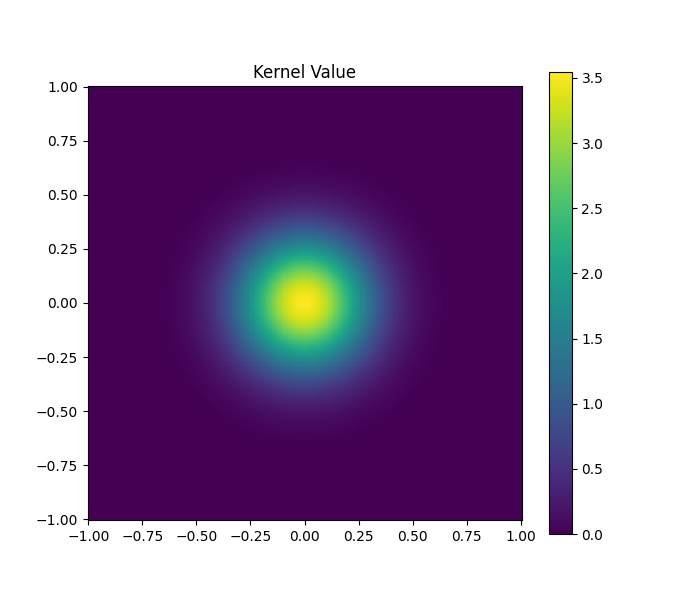

In [15]:
nGrid = 256
x = torch.linspace(-1,1, nGrid)
y = torch.linspace(-1,1, nGrid)
X,Y = torch.meshgrid(x,y, indexing = 'ij')
positions = torch.stack([X, Y], dim = -1).flatten().view(-1,2) * support
print(positions.shape)

kernelValue = kernel.eval(positions, support)
kernelValue = kernelValue.view(nGrid,nGrid)

fig, axis = plt.subplots(1, 1, figsize = (7,6), squeeze=False)

sc = axis[0,0].pcolormesh(X, Y, kernelValue, shading = 'auto', cmap = 'viridis')
fig.colorbar(sc, ax = axis[0,0])
axis[0,0].set_aspect('equal')
axis[0,0].set_title('Kernel Value')


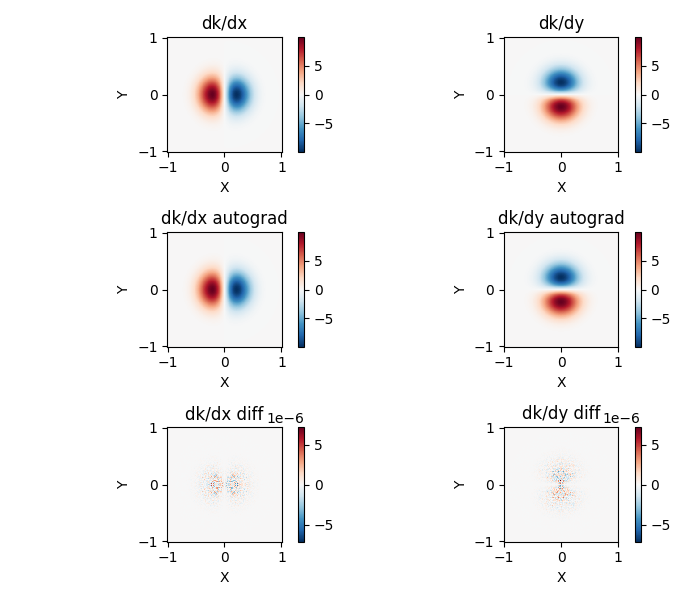

In [16]:
gradKernelValue = kernel.jacobian(positions, support)
# gradKernelValue = gradKernelValue.view(nGrid,nGrid,2)

positions_g = positions.clone()
positions_g.requires_grad = True
kernelValue_g = kernel.eval(positions_g, support)

grad_outputs = torch.ones_like(kernelValue_g)
gradients = autograd.grad(outputs=kernelValue_g, inputs=positions_g, grad_outputs=grad_outputs, create_graph=True)

fig, axis = plt.subplots(3, 2, figsize = (7,6), squeeze=False)

def plotMesh(fig, axis, positions, values, nGrid, cmap = 'RdBu_r', title = None):
    X = positions[:,0].view(nGrid,nGrid)
    Y = positions[:,1].view(nGrid,nGrid)
    sc = axis.pcolormesh(X, Y, values.view(nGrid,nGrid), shading = 'auto', cmap = cmap)
    fig.colorbar(sc, ax = axis)
    axis.set_aspect('equal')
    # axis[0,0].set_title('Values')
    axis.set_xlabel('X')
    axis.set_ylabel('Y')
    if title is not None:
        axis.set_title(title)

plotMesh(fig, axis[0,0], positions, gradKernelValue[:,0], nGrid, title = 'dk/dx')
plotMesh(fig, axis[0,1], positions, gradKernelValue[:,1], nGrid, title = 'dk/dy')
plotMesh(fig, axis[1,0], positions, gradients[0][:,0].detach(), nGrid, title = 'dk/dx autograd')
plotMesh(fig, axis[1,1], positions, gradients[0][:,1].detach(), nGrid, title = 'dk/dy autograd')

plotMesh(fig, axis[2,0], positions, gradients[0][:,0].detach() - gradKernelValue[:,0], nGrid, title = 'dk/dx diff')
plotMesh(fig, axis[2,1], positions, gradients[0][:,1].detach() - gradKernelValue[:,1], nGrid, title = 'dk/dy diff')

fig.tight_layout()

In [17]:
difference = gradients[0].detach() - gradKernelValue
print(difference.abs().max())

tensor(7.1526e-06)


In [18]:
from typing import Tuple, Callable
def derivative(out_fn: Tuple[torch.Tensor, Callable], *args):
    # outputs = fn(*args)
    if isinstance(out_fn, torch.Tensor):
        outputs = out_fn
    else:
        outputs = out_fn(*args)
    # if not isinstance(outputs, torch.Tensor):
    #     gradients = []
    #     for o, out in enumerate(outputs):
    #         gradients.append(derivative(lambda *a: fn(*a)[o], *args))
    #     return gradients

    # print('Output Shape:', outputs.shape)
    # print('------------------------------')

    argGrads = []
    trailingOutputShape = outputs.shape[1:]
    if len(trailingOutputShape) == 0:
        grad_outputs = torch.ones_like(outputs)
        gradients = autograd.grad(outputs=outputs, inputs=args, grad_outputs=grad_outputs, create_graph=True)
        return gradients
    else:
        for iarg, arg in enumerate(args):
            # print(f'\tArgument {iarg} [{arg.shape}]')
            argGrad = arg.new_zeros((arg.shape[0], *outputs.shape[1:], *arg.shape[1:]))
            # print(arg.shape)
        
            # print('\tTrailing Output Shape:', trailingOutputShape)
            # print('\tArg Grad Shape:', argGrad.shape)

            flattenedOutput = outputs.flatten(start_dim = 1)
            expanded = False
            if len(arg.shape) == 1:
                expanded = True
                argGrad = argGrad.view(-1,*trailingOutputShape,1)
                # print('Expanding to:', argGrad.shape)
            flattenedGrad = argGrad.flatten(start_dim = 1, end_dim = -2)
            for i in range(flattenedOutput.shape[1]):
                grad_outputs = torch.zeros_like(flattenedOutput)
                grad_outputs[:,i] = 1
                grad_outputs = grad_outputs.view(*outputs.shape)
                gradients = autograd.grad(outputs=outputs, inputs=arg, grad_outputs=grad_outputs, create_graph=True)
                
                # print(f'flattenedGrad: {flattenedGrad.shape}, gradients: {gradients[0].shape}')
                # print(gradients[0].shape)
                if len(gradients[0].shape) == 1:
                    # gradients[0] = gradients[0].view(-1,1)
                    flattenedGrad[:,i,:] = gradients[0].view(-1,1).flatten(start_dim = 1)
                else:
                    flattenedGrad[:,i,:] = gradients[0].flatten(start_dim = 1)

            if expanded:
                # print('Squeezing')
                argGrad = argGrad.view(arg.shape[0],*trailingOutputShape)
            argGrads.append(argGrad)
            # print('\t', argGrad.shape)
            # print('------------------------------')
        return argGrads
    

# print('Gradient for Kernel:')
# derivative(kernel.eval, positions_g, supports_g)
# print('\n\nGradient for Jacobian:')
# H = derivative(kernel.jacobian, positions_g, supports_g)
# for h in H:
#     print(h.shape)
# P = derivative(kernel.hessian, positions_g, supports_g)
# for p in P:
#     print(p.shape)

In [25]:
# def Jaco

def eval_fn_grad(out_fn: Tuple[torch.Tensor, Callable], arg, order = 1):
    if isinstance(out_fn, torch.Tensor):
        gradients = [out_fn]
    else:
        gradients = [out_fn(arg)]
    for o in range(1, order+1):
        gradients.append(derivative(gradients[-1], arg)[0])
    return gradients

def Jacobian(out_fn: Tuple[torch.Tensor, Callable], arg):
    return eval_fn_grad(out_fn, arg, 1)[-1]
def Hessian(out_fn: Tuple[torch.Tensor, Callable], arg):
    return eval_fn_grad(out_fn, arg, 2)[-1]
def Patrician(out_fn: Tuple[torch.Tensor, Callable], arg):
    return eval_fn_grad(out_fn, arg, 3)[-1]


supports_g = torch.ones_like(positions_g[:,0]) * support
supports_g.requires_grad = True
derivatives = eval_fn_grad(lambda x: kernel.eval(x, supports_g), positions_g, 5)
for d in derivatives:
    print(d.shape)

: 

In [135]:
J_grad = Jacobian(lambda x: kernel.eval(x, supports_g), positions_g)
J_analytic = kernel.jacobian(positions_g, supports_g)
print((J_grad - J_analytic).abs().max())

tensor(5.7220e-05, grad_fn=<MaxBackward1>)


In [136]:
H_grad = Hessian(lambda x: kernel.eval(x, supports_g), positions_g)
H_analytic = kernel.hessian(positions_g, supports_g)
print((H_grad - H_analytic).abs().max())

tensor(0.0022, grad_fn=<MaxBackward1>)


In [138]:
P_grad = Patrician(lambda x: kernel.eval(x, supports_g), positions_g)
P_analytic = kernel.thirdOrderDerivatives(positions_g, supports_g)
print((P_grad - P_analytic).abs().max())

tensor(83.8767, grad_fn=<MaxBackward1>)


In [142]:
# fig, axis = plt.subplots(2, 4, figsize = (12,6), squeeze=False)

# plotMesh(fig, axis[0,0], positions, P_grad[:,0,0,0].detach(), nGrid, title = 'P_grad[:,0,0,0]')
# plotMesh(fig, axis[0,1], positions, P_grad[:,0,0,1].detach(), nGrid, title = 'P_grad[:,0,0,1]')
# plotMesh(fig, axis[0,2], positions, P_grad[:,0,1,0].detach(), nGrid, title = 'P_grad[:,0,1,0]')
# plotMesh(fig, axis[0,3], positions, P_grad[:,0,1,1].detach(), nGrid, title = 'P_grad[:,0,1,1]')
# plotMesh(fig, axis[1,0], positions, P_grad[:,1,0,0].detach(), nGrid, title = 'P_grad[:,1,0,0]')
# plotMesh(fig, axis[1,1], positions, P_grad[:,1,0,1].detach(), nGrid, title = 'P_grad[:,1,0,1]')
# plotMesh(fig, axis[1,2], positions, P_grad[:,1,1,0].detach(), nGrid, title = 'P_grad[:,1,1,0]')
# plotMesh(fig, axis[1,3], positions, P_grad[:,1,1,1].detach(), nGrid, title = 'P_grad[:,1,1,1]')

# fig.tight_layout()

# fig, axis = plt.subplots(2, 4, figsize = (12,6), squeeze=False)

# plotMesh(fig, axis[0,0], positions, P_analytic[:,0,0,0].detach(), nGrid, title = 'P_analytic[:,0,0,0]')
# plotMesh(fig, axis[0,1], positions, P_analytic[:,0,0,1].detach(), nGrid, title = 'P_analytic[:,0,0,1]')
# plotMesh(fig, axis[0,2], positions, P_analytic[:,0,1,0].detach(), nGrid, title = 'P_analytic[:,0,1,0]')
# plotMesh(fig, axis[0,3], positions, P_analytic[:,0,1,1].detach(), nGrid, title = 'P_analytic[:,0,1,1]')
# plotMesh(fig, axis[1,0], positions, P_analytic[:,1,0,0].detach(), nGrid, title = 'P_analytic[:,1,0,0]')
# plotMesh(fig, axis[1,1], positions, P_analytic[:,1,0,1].detach(), nGrid, title = 'P_analytic[:,1,0,1]')
# plotMesh(fig, axis[1,2], positions, P_analytic[:,1,1,0].detach(), nGrid, title = 'P_analytic[:,1,1,0]')
# plotMesh(fig, axis[1,3], positions, P_analytic[:,1,1,1].detach(), nGrid, title = 'P_analytic[:,1,1,1]')

# fig.tight_layout()

# fig, axis = plt.subplots(2, 4, figsize = (12,6), squeeze=False)

# plotMesh(fig, axis[0,0], positions, P_grad[:,0,0,0].detach() - P_analytic[:,0,0,0].detach(), nGrid, title = 'P_grad[:,0,0,0] diff')
# plotMesh(fig, axis[0,1], positions, P_grad[:,0,0,1].detach() - P_analytic[:,0,0,1].detach(), nGrid, title = 'P_grad[:,0,0,1] diff')
# plotMesh(fig, axis[0,2], positions, P_grad[:,0,1,0].detach() - P_analytic[:,0,1,0].detach(), nGrid, title = 'P_grad[:,0,1,0] diff')
# plotMesh(fig, axis[0,3], positions, P_grad[:,0,1,1].detach() - P_analytic[:,0,1,1].detach(), nGrid, title = 'P_grad[:,0,1,1] diff')
# plotMesh(fig, axis[1,0], positions, P_grad[:,1,0,0].detach() - P_analytic[:,1,0,0].detach(), nGrid, title = 'P_grad[:,1,0,0] diff')
# plotMesh(fig, axis[1,1], positions, P_grad[:,1,0,1].detach() - P_analytic[:,1,0,1].detach(), nGrid, title = 'P_grad[:,1,0,1] diff')
# plotMesh(fig, axis[1,2], positions, P_grad[:,1,1,0].detach() - P_analytic[:,1,1,0].detach(), nGrid, title = 'P_grad[:,1,1,0] diff')
# plotMesh(fig, axis[1,3], positions, P_grad[:,1,1,1].detach() - P_analytic[:,1,1,1].detach(), nGrid, title = 'P_grad[:,1,1,1] diff')

# fig.tight_layout()

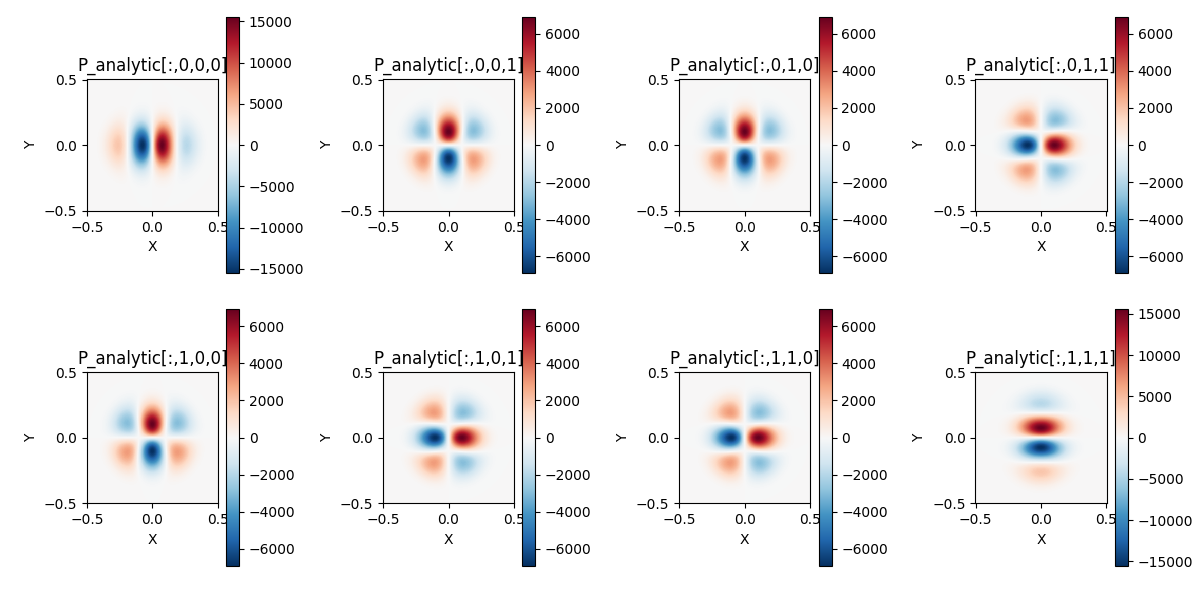

In [107]:
def fseries(x, n):
    # print(x.shape)
    if n == 0:
        return torch.ones_like(x).view(-1,1)
    else:
        terms = [torch.ones_like(x)]
        for i in range(1,n):
            if i % 2 == 0:
                terms.append(torch.sin(i * x))
            else:
                terms.append(torch.cos(i * x))
        return torch.stack(terms, dim = -1)
    
# fseries(p[:,0], 3)

# fn = lambda p, h: torch.einsum('ij, ik -> ijk', fseries(p[:,0]/h, 3), fseries(p[:,1]/h, 3))
# f = fn(positions_g, supports_g)
fn = lambda p,h: fseries(p[:,0]/h, 3)
J = derivative(fn, positions_g, supports_g)
for j in J:
    print(j.shape)


torch.Size([65025, 3, 2])
torch.Size([65025, 3])


In [62]:
J = derivative(kernel.eval, positions_g, supports_g)
for j in J:
    print(j.shape)
H = derivative(lambda *a: derivative(kernel.eval, *a), positions_g, supports_g)
for h in H:
    print('.')
    for h_ in h:
        print(h_.shape)

Output Shape: torch.Size([65025])
------------------------------
torch.Size([65025, 2])
torch.Size([65025])
Output Shape: torch.Size([65025])
------------------------------
Output Shape: torch.Size([65025])
------------------------------
Output Shape: torch.Size([65025, 2])
------------------------------
	Argument 0 [torch.Size([65025, 2])]
	Trailing Output Shape: torch.Size([2])
torch.Size([65025, 2, 2])
torch.Size([65025, 2])
torch.Size([65025, 2, 2])
torch.Size([65025, 2])
	 torch.Size([65025, 2, 2])
------------------------------
	Argument 1 [torch.Size([65025])]
	Trailing Output Shape: torch.Size([2])
Expanding
torch.Size([65025, 1, 2])
torch.Size([65025])
torch.Size([65025, 1, 2])
torch.Size([65025])
Squeezing
	 torch.Size([65025, 2])
------------------------------
Output Shape: torch.Size([65025])
------------------------------
Output Shape: torch.Size([65025])
------------------------------
.
torch.Size([65025, 2, 2])
torch.Size([65025, 2])
.
torch.Size([65025, 2])
torch.Size([

In [37]:
from torch.autograd.functional import jacobian
from torch.func import jacrev

def evalFunctionAndGradients(fn, *args):
    req_grad = [arg for arg in args if isinstance(arg, torch.Tensor) and arg.requires_grad]
    f = lambda *args: fn(*args)

    if len(req_grad) == 0:
        return fn(*args), None
    else:
        outputs = fn(*args)
        grad_outputs = torch.ones_like(outputs)
        gradients = autograd.grad(outputs=outputs, inputs=req_grad, grad_outputs=grad_outputs, create_graph=True)
        # gradients = jacobian(func=fn, inputs=args, create_graph=True, vectorize=True)
        return outputs, gradients
    
def evaluFunctionAndSecondGradients(fn, *args):
    req_grad = [arg for arg in args if isinstance(arg, torch.Tensor) and arg.requires_grad]

    if len(req_grad) == 0:
        return fn(*args), None
    else:
        outputs = fn(*args)
        grad_outputs = torch.ones_like(outputs)
        gradients = autograd.grad(outputs=outputs, inputs=req_grad, grad_outputs=grad_outputs, create_graph=True)

        second_gradients = []
        for out_grad in gradients:
            if len(out_grad.shape) > 1:
                for out_i in range(len(out_grad.shape)):
                    out_ = out_grad[:,out_i]
                    print(f'Out Gradient {out_.shape}')
                    # print(f'Out Gradient {out_grad.shape}')
                    grad_outputs = torch.ones_like(out_)
                    # grad_outputs = out_grad.new_ones((out_grad.shape[0], 2, 2))
                    
                    for in_grad in req_grad:
                        print(f'In Gradient {in_grad.shape}')
                        second_gradients.append(autograd.grad(outputs=out_, inputs=in_grad, grad_outputs=grad_outputs, create_graph=True))
            else:
                print(f'Out Gradient {out_grad.shape}')
                grad_outputs = torch.ones_like(out_grad)
                # grad_outputs = out_grad.new_ones((out_grad.shape[0], 2, 2))
                
                for in_grad in req_grad:
                    print(f'In Gradient {in_grad.shape}')
                    second_gradients.append(autograd.grad(outputs=out_grad, inputs=in_grad, grad_outputs=grad_outputs, create_graph=True))
        return outputs, gradients, second_gradients
    
# f, (x_grad, h_grad), second = evaluFunctionAndSecondGradients(kernel.eval, positions_g, supports_g)
positions_g = positions.clone()
positions_g.requires_grad = True
supports_g = torch.ones_like(positions_g[:,0]) * support
supports_g.requires_grad = True

f, (x_grad, h_grad) = evalFunctionAndGradients(kernel.eval, positions_g, supports_g)

In [38]:
positions_g = positions.clone()
positions_g.requires_grad = True
supports_g = torch.ones_like(positions_g[:,0]) * support
supports_g.requires_grad = True

f, (x_grad, h_grad) = evalFunctionAndGradients(kernel.eval, positions_g, supports_g)

In [39]:
f_ref = kernel.eval(positions, support)
x_grad_ref = kernel.jacobian(positions, support)
h_grad_ref = kernel.dkdh(positions, support)

In [40]:
diff_f = (f - f_ref)
diff_x = (x_grad - x_grad_ref)
diff_h = (h_grad - h_grad_ref)

print(f'f: {diff_f.abs().max()}')
print(f'x: {diff_x.abs().max()}')
print(f'h: {diff_h.abs().max()}')


f: 0.0
x: 3.814697265625e-05
h: 1.1444091796875e-05


In [108]:

second = derivative(kernel.jacobian, positions_g, supports_g)
for s in second:
    print(s.shape)

torch.Size([65025, 2, 2])
torch.Size([65025, 2])


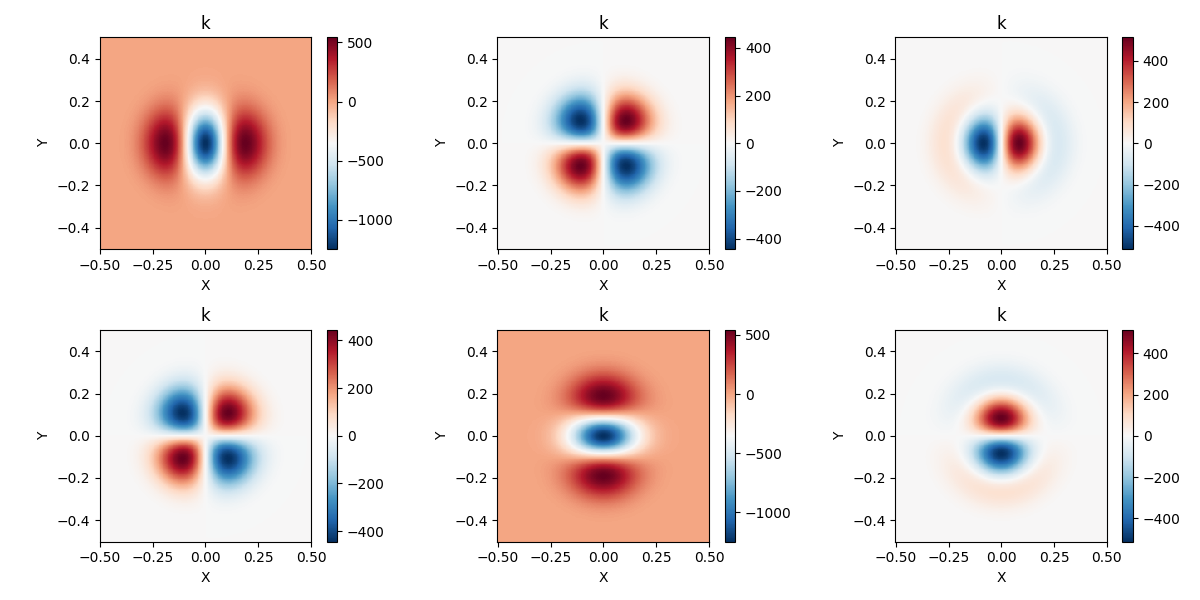

In [109]:
fig, axis = plt.subplots(2, 3, figsize = (12,6), squeeze=False)

plotMesh(fig, axis[0,0], positions, second[0][:,0,0].detach(), nGrid, title = 'k')
plotMesh(fig, axis[1,0], positions, second[0][:,1,0].detach(), nGrid, title = 'k')

plotMesh(fig, axis[0,1], positions, second[0][:,0,1].detach(), nGrid, title = 'k')
plotMesh(fig, axis[1,1], positions, second[0][:,1,1].detach(), nGrid, title = 'k')

plotMesh(fig, axis[0,2], positions, second[1][:,0].detach(), nGrid, title = 'k')
plotMesh(fig, axis[1,2], positions, second[1][:,1].detach(), nGrid, title = 'k')

fig.tight_layout()

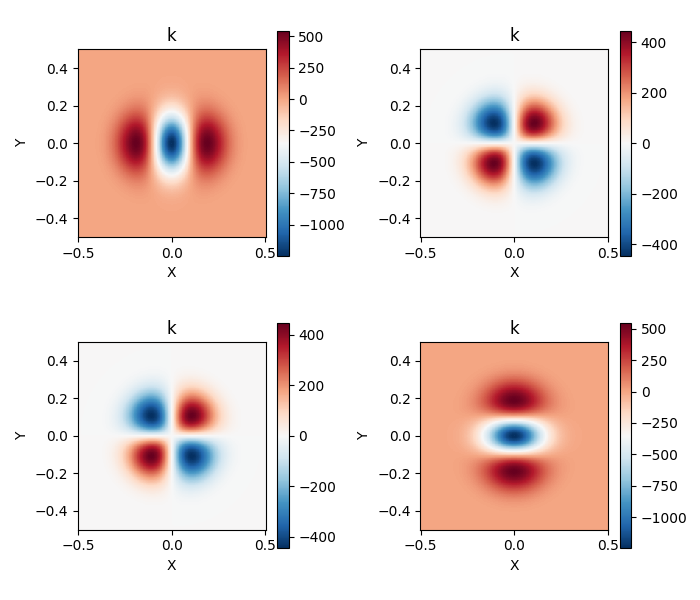

In [54]:
H = kernel.hessian(positions, support)
# H2 = kernel.dk2dh(

fig, axis = plt.subplots(2, 2, figsize = (7,6), squeeze=False)

plotMesh(fig, axis[0,0], positions, H[:,0,0], nGrid, title = 'k')
plotMesh(fig, axis[0,1], positions, H[:,0,1], nGrid, title = 'k')
plotMesh(fig, axis[1,0], positions, H[:,1,0], nGrid, title = 'k')
plotMesh(fig, axis[1,1], positions, H[:,1,1], nGrid, title = 'k')

fig.tight_layout()